In [56]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis
from rllte.evaluation import Performance

# Effectiveness Analysis

## 1. Mario + Baseline

In [57]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'Extrinsic']
colors = sns.color_palette("husl", len(algos))
all_data = {'ICM': [], 'Disagreement': [], 'E3B': [], 'RND': [], 'PseudoCounts': [], 'RIDE': [], 'Extrinsic': []}
num_points = 10

root = "../misc/logs/mario/baseline"

for algo in algos:
    for dir in os.listdir("../misc/logs/mario/baseline"):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + '/' + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']
            data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            all_data[algo].append(data)
    
    all_data[algo] = np.array(all_data[algo])
    all_data[algo] = np.expand_dims(all_data[algo], axis=1)

sampling_dict = dict()
for algo in algos:
    sampling_dict[algo] = [[], [], []]
    for frame in range(num_points):
        perf = Performance(all_data[algo][:, :, frame], get_ci=True, reps=2000)
        value, CIs = perf.aggregate_iqm()
        sampling_dict[algo][0].append(value)
        sampling_dict[algo][1].append(CIs[0]) # lower bound
        sampling_dict[algo][2].append(CIs[1]) # upper bound

    sampling_dict[algo][0] = np.array(sampling_dict[algo][0]).reshape(-1)
    sampling_dict[algo][1] = np.array(sampling_dict[algo][1]).reshape(-1)
    sampling_dict[algo][2] = np.array(sampling_dict[algo][2]).reshape(-1)

In [61]:
all_data['ICM']

array([[[ 5.91000128,  4.49197794,  8.14299754,  6.87394557,
          9.02699885,  8.74001365,  7.41100228,  7.86698837,
          2.0780023 ,         nan]],

       [[ 6.0099926 ,  9.01600175,  7.84600406,  5.77698448,
          7.30899658, 10.50900803,  8.45200207,  8.76799054,
         11.04999509, 11.08999872]],

       [[ 4.92999911,  5.23096597, 14.5390172 , 16.90001774,
         16.25901465,  9.34000576,  8.98200202, 14.60001647,
         17.32301149, 18.06500807]]])

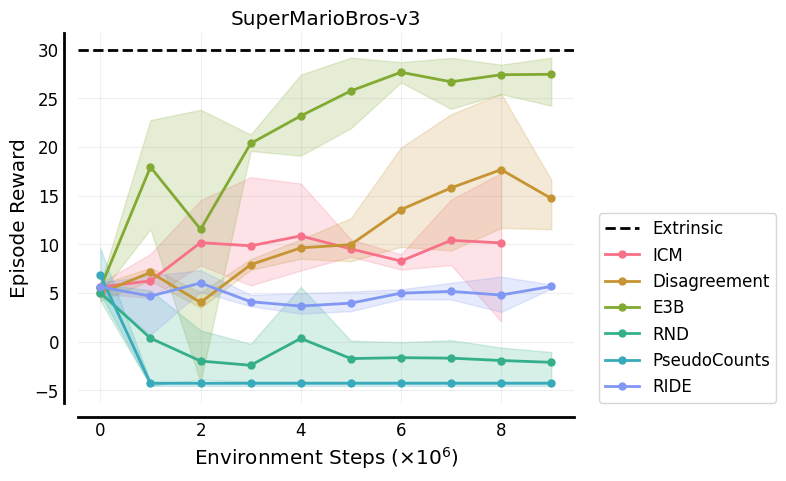

In [60]:
fig, ax = plt.subplots()

ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
for algo, color in zip(algos[:-1], colors):
    mean, ci_high, ci_low = sampling_dict[algo]
    ax.plot(mean, linewidth=2, marker='o', markersize=5, c=color, label=algo)
    ax.fill_between(range(num_points), ci_high, ci_low, alpha=0.2, color=color)

ax.set_title('SuperMarioBros-v3', fontsize="x-large")
ax = _annotate_and_decorate_axis(ax, 
                                 ticklabelsize="large",
                                 xlabel=r"Environment Steps ($\times 10^6$)", 
                                 ylabel="Episode Reward",
                                 xticklabels=np.linspace(0, 1, num_points),
                                 )
# ax.legend(loc='upper left', fontsize='large')
ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0, fontsize='large')

In [16]:
values = sns.color_palette("husl", 9)
values

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]